# Fase 1 - Entendimento do Negócio

1. Escreva um algoritmo em Python que realize o treinamento um modelo
que estime o tempo de vida útil restante dos motores da base FD001.
2. Apesar dos dados serem séries temporais, também são permitidas
soluções que não considerem o aspecto temporal.
3. Atente-se a um código limpo, organizado, documentado e com ideias
claras da solução proposta.
4. Caso mais de um modelo seja produzido, comente sobre os resultados
obtidos, explicitando qual deles funcionou melhor e o porquê.
5. Encoraja-se o uso do Jupyter Notebook e a produção de gráficos e
tabelas que auxiliem na interpretação das escolhas realizadas.

In [184]:
# importando as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error

# Fase 2 - Entedimento dos Dados (EDA)

In [617]:
# Criando uma lista com os nomes das colunas descritas no README 
columns = ['unit', 'time_in_cycles','operational_setting_1','operational_setting_2','operational_setting_3']
for i in range(1,27):
  columns.append('sensor_' + str(i))

In [622]:
# Carregando os dados de treinamento, teste e a variável de saída do teste

train = pd.read_csv("train_FD001.txt", sep = ' ', header = None, names= columns)
test = pd.read_csv("test_FD001.txt", sep = ' ', header = None, names= columns)
y = pd.read_csv("RUL_FD001.txt",header = None, names = ['RUL'])

In [619]:
# Verificando o shape da base de treinamento
train.shape

(20631, 31)

In [37]:
# Verificando como os dados estão dispostos na base de treinamento
train.head()

,unit,time_in_cycles,operational_setting_1,operational_setting_2,operational_setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21,sensor_22,sensor_23,sensor_24,sensor_25,sensor_26
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,392,2388,100.0,39.06,23.4190,NaN,NaN,NaN,NaN,NaN
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,392,2388,100.0,39.00,23.4236,NaN,NaN,NaN,NaN,NaN
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,390,2388,100.0,38.95,23.3442,NaN,NaN,NaN,NaN,NaN
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,392,2388,100.0,38.88,23.3739,NaN,NaN,NaN,NaN,NaN
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,393,2388,100.0,38.90,23.4044,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,...,397,2388,100.0,38.49,22.9735,NaN,NaN,NaN,NaN,NaN
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,...,395,2388,100.0,38.30,23.1594,NaN,NaN,NaN,NaN,NaN
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,...,398,2388,100.0,38.44,22.9333,NaN,NaN,NaN,NaN,NaN
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,...,395,2388,100.0,38.29,23.0640,NaN,NaN,NaN,NaN,NaN


In [623]:
# Criando a variável alvo (RUL) na base de treinamento

train = pd.merge(train, train.groupby('unit', as_index=False)['time_in_cycles'].max(), how='left', on='unit')
train.rename(columns={"time_in_cycles_x": "time_in_cycles","time_in_cycles_y": "maxcycles"},inplace=True)
train['RUL'] = train['maxcycles'] - train['time_in_cycles']
train = train.drop(['maxcycles'], axis=1)

In [346]:
# Verificando o tipo de cada variável
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20631 entries, 0 to 20630
Data columns (total 32 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   unit                   20631 non-null  int64  
 1   time_in_cycles         20631 non-null  int64  
 2   operational_setting_1  20631 non-null  float64
 3   operational_setting_2  20631 non-null  float64
 4   operational_setting_3  20631 non-null  float64
 5   sensor_1               20631 non-null  float64
 6   sensor_2               20631 non-null  float64
 7   sensor_3               20631 non-null  float64
 8   sensor_4               20631 non-null  float64
 9   sensor_5               20631 non-null  float64
 10  sensor_6               20631 non-null  float64
 11  sensor_7               20631 non-null  float64
 12  sensor_8               20631 non-null  float64
 13  sensor_9               20631 non-null  float64
 14  sensor_10              20631 non-null  float64
 15  se

In [347]:
# Verificando as estatíticas básicas de cada variável
train.describe().T

,count,mean,std,min,25%,50%,75%,max
unit,20631.0,51.506568,2.922763e+01,1.0000,26.0000,52.0000,77.0000,100.0000
time_in_cycles,20631.0,108.807862,6.888099e+01,1.0000,52.0000,104.0000,156.0000,362.0000
operational_setting_1,20631.0,-0.000009,2.187313e-03,-0.0087,-0.0015,0.0000,0.0015,0.0087
operational_setting_2,20631.0,0.000002,2.930621e-04,-0.0006,-0.0002,0.0000,0.0003,0.0006
operational_setting_3,20631.0,100.000000,0.000000e+00,100.0000,100.0000,100.0000,100.0000,100.0000
sensor_1,20631.0,518.670000,6.537152e-11,518.6700,518.6700,518.6700,518.6700,518.6700
sensor_2,20631.0,642.680934,5.000533e-01,641.2100,642.3250,642.6400,643.0000,644.5300
sensor_3,20631.0,1590.523119,6.131150e+00,1571.0400,1586.2600,1590.1000,1594.3800,1616.9100
sensor_4,20631.0,1408.933782,9.000605e+00,1382.2500,1402.3600,1408.0400,1414.5550,1441.4900
sensor_5,20631.0,14.620000,3.394700e-12,14.6200,14.6200,14.6200,14.6200,14.6200


In [348]:
# Porcentagem de valores NA em cada coluna
train.isna().sum()*100/len(train)

unit                       0.0
time_in_cycles             0.0
operational_setting_1      0.0
operational_setting_2      0.0
operational_setting_3      0.0
sensor_1                   0.0
sensor_2                   0.0
sensor_3                   0.0
sensor_4                   0.0
sensor_5                   0.0
sensor_6                   0.0
sensor_7                   0.0
sensor_8                   0.0
sensor_9                   0.0
sensor_10                  0.0
sensor_11                  0.0
sensor_12                  0.0
sensor_13                  0.0
sensor_14                  0.0
sensor_15                  0.0
sensor_16                  0.0
sensor_17                  0.0
sensor_18                  0.0
sensor_19                  0.0
sensor_20                  0.0
sensor_21                  0.0
sensor_22                100.0
sensor_23                100.0
sensor_24                100.0
sensor_25                100.0
sensor_26                100.0
RUL                        0.0
dtype: f

In [349]:
# Checando as variáveis numéricas sem variância
train.var() == 0.0

unit                     False
time_in_cycles           False
operational_setting_1    False
operational_setting_2    False
operational_setting_3     True
sensor_1                 False
sensor_2                 False
sensor_3                 False
sensor_4                 False
sensor_5                 False
sensor_6                 False
sensor_7                 False
sensor_8                 False
sensor_9                 False
sensor_10                False
sensor_11                False
sensor_12                False
sensor_13                False
sensor_14                False
sensor_15                False
sensor_16                False
sensor_17                False
sensor_18                 True
sensor_19                 True
sensor_20                False
sensor_21                False
sensor_22                False
sensor_23                False
sensor_24                False
sensor_25                False
sensor_26                False
RUL                      False
dtype: b

In [624]:
# Excluindo colunas sem variância e preenchidas apenas com valores NA

train = train.drop(['operational_setting_3','sensor_18','sensor_19','sensor_22','sensor_23','sensor_24','sensor_25','sensor_26'], axis=1)
test = test.drop(['operational_setting_3','sensor_18','sensor_19','sensor_22','sensor_23','sensor_24','sensor_25','sensor_26'], axis=1)

In [592]:
# Verificando a correlação das variáveis numéricas

corr = train.corr()
corr.style.background_gradient(cmap='coolwarm')

C:\ProgramData\Anaconda3\lib\site-packages\pandas\io\formats\style.py:1264: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(s.to_numpy()) if vmin is None else vmin
C:\ProgramData\Anaconda3\lib\site-packages\pandas\io\formats\style.py:1265: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(s.to_numpy()) if vmax is None else vmax


,unit,time_in_cycles,operational_setting_1,operational_setting_2,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,sensor_10,sensor_11,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_20,sensor_21,RUL
unit,1.000000,0.078753,-0.017895,-0.006197,nan,0.014133,0.012621,0.026116,nan,0.026431,-0.032073,0.039929,-0.052053,nan,0.024707,-0.031882,0.044230,-0.059473,0.022486,nan,0.013513,-0.020589,-0.016465,0.078753
time_in_cycles,0.078753,1.000000,-0.004527,0.016132,nan,0.549898,0.543947,0.624577,nan,0.105980,-0.595914,0.475977,0.443999,nan,0.634385,-0.611354,0.477523,0.370324,0.588676,nan,0.566995,-0.583597,-0.585923,-0.736241
operational_setting_1,-0.017895,-0.004527,1.000000,0.011660,nan,0.009030,-0.005651,0.009544,nan,-0.001340,-0.009437,-0.000427,-0.004279,nan,0.011658,-0.001491,0.002318,-0.004469,0.007652,nan,0.002599,-0.005713,-0.014559,-0.003198
operational_setting_2,-0.006197,0.016132,0.011660,1.000000,nan,0.007266,0.009068,0.014673,nan,0.014355,-0.016678,0.013285,-0.005425,nan,0.011690,-0.010923,0.018156,-0.006310,0.014156,nan,0.012280,-0.010554,-0.007846,-0.001948
sensor_1,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
sensor_2,0.014133,0.549898,0.009030,0.007266,nan,1.000000,0.602610,0.714949,nan,0.132242,-0.702136,0.662325,0.273764,nan,0.740020,-0.724578,0.661792,0.179752,0.675975,nan,0.629886,-0.661841,-0.668050,-0.606484
sensor_3,0.012621,0.543947,-0.005651,0.009068,nan,0.602610,1.000000,0.678413,nan,0.116039,-0.664595,0.602481,0.322964,nan,0.695900,-0.680307,0.600963,0.237137,0.639921,nan,0.600017,-0.625941,-0.633901,-0.584520
sensor_4,0.026116,0.624577,0.009544,0.014673,nan,0.714949,0.678413,1.000000,nan,0.150480,-0.793130,0.746852,0.297429,nan,0.830136,-0.815591,0.745158,0.190748,0.758459,nan,0.703499,-0.748067,-0.745193,-0.678948
sensor_5,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
sensor_6,0.026431,0.105980,-0.001340,0.014355,nan,0.132242,0.116039,0.150480,nan,1.000000,-0.155720,0.152161,0.019347,nan,0.160014,-0.155884,0.158276,-0.002112,0.149042,nan,0.130810,-0.141419,-0.137419,-0.128348


In [395]:
# Destacando a correlação entre o sensor_14 e RUL

train[['sensor_14', 'RUL']].corr().iloc[1,0]

-0.30676887025751065

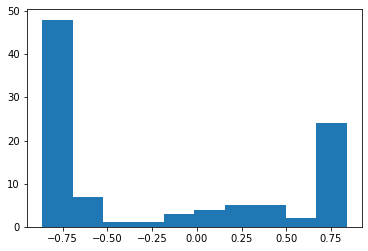

Correlação mínima:  -0.8647110687444214
Correlação máxima:  0.8365053692687078


In [408]:
# Verificando a correlação do sensor_14 em relação a variável alvo em cada unit

correlation = train.groupby('unit')[['sensor_14','RUL']].corr().unstack().iloc[:,1]
plt.hist(correlation)
plt.show()

print("Correlação mínima: ", correlation.min())
print("Correlação máxima: ", correlation.max())

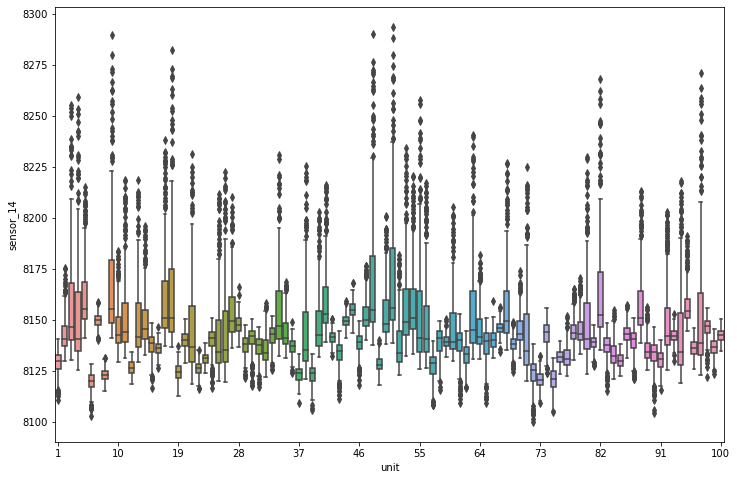

In [448]:
# Boxplot da variável sensor_14 para cada unit 

plt.figure(figsize=(12, 8))
sns.boxplot(data=train, x='unit', y='sensor_14')
plt.xticks(range(0,101,9))
plt.show()

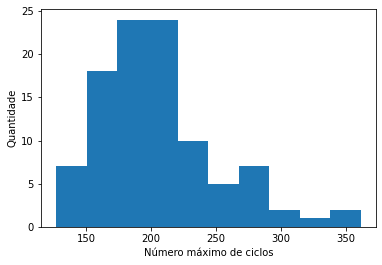

Número mínimo de ciclos antes de quebrar:  127
Número máximo de ciclos antes de quebrar:  361


In [386]:
#Verificando o número máximo de ciclos  

plt.hist(train.groupby('unit')['RUL'].max())
plt.xlabel("Número máximo de ciclos")
plt.ylabel("Quantidade")
plt.show()

print("Número mínimo de ciclos antes de quebrar: ", train.groupby('unit')['RUL'].max().min())
print("Número máximo de ciclos antes de quebrar: ", train.groupby('unit')['RUL'].max().max())

## Fase 3: Preparação de Dados

In [625]:
# Excluindo as variáveis que apresentaram correlação NA
train = train.drop(['sensor_1','sensor_10','sensor_16'], axis=1)
test = test.drop(['sensor_1','sensor_10','sensor_16'], axis=1)

In [626]:
# Padronização da base
scaler = MinMaxScaler()
train.iloc[:,2:19] = scaler.fit_transform(train.iloc[:,2:19])
test.iloc[:,2:19] = scaler.transform(test.iloc[:,2:19])

In [627]:
# Dados para treinar e testar com todas as units
X_train = train.values[:, 2:19]
y_train = train.values[:,20]

X_test = test.values[:,2:19]

In [632]:
# Dados para treinar e testar apenas com a unit 1
X_train_1 = train[train.unit == 1].values[:, 2:19]
y_train_1 = train[train.unit == 1].values[:,20]

X_test_1 = test[test.unit == 1].values[:,2:19]

## Fase 4: Modelagem

### Random Forest

In [633]:
# Treinando todas as unidades juntas
regressor= RandomForestRegressor()
regressor.fit(X_train, y_train)

RandomForestRegressor()

In [634]:
# Treinando só a unit 1
regressor_1= RandomForestRegressor()
regressor_1.fit(X_train_1, y_train_1)

RandomForestRegressor()

## Fase 5: Avaliação

In [635]:
# Obtendo os valores preditos do regressor com todas as units
y_pred = regressor.predict(X_test)

# Obtendo os valores preditos do regressor só com unit 1
y_pred_1 = regressor_1.predict(X_test_1)

In [636]:
# Adcionando os resultados aos datasets
test['predicted_RUL_all'] = y_pred

test_1 = test[test.unit == 1].copy()
test_1['predicted_RUL'] = y_pred_1

In [637]:
# Pegando a média das RULs dos 5 ultimos valores de cada unit

# Todas as units
test = pd.merge(test, test.groupby('unit', as_index=False)['time_in_cycles'].max(), how='left', on='unit')
test.rename(columns={"time_in_cycles_x": "time_in_cycles","time_in_cycles_y": "maxcycles"},inplace=True)
test['cycles_diff'] = test['maxcycles'] - test['time_in_cycles']
test = test[test['cycles_diff'] <= 5] 
y_pred = test.groupby('unit', as_index=False)['predicted_RUL_all'].mean()

# Apenas a unit 1
test_1 = pd.merge(test_1, test_1.groupby('unit', as_index=False)['time_in_cycles'].max(), how='left', on='unit')
test_1.rename(columns={"time_in_cycles_x": "time_in_cycles","time_in_cycles_y": "maxcycles"},inplace=True)
test_1['cycles_diff'] = test_1['maxcycles'] - test_1['time_in_cycles']
test_1 = test_1[test_1['cycles_diff'] <= 5] 
y_pred_1 = test_1.groupby('unit', as_index=False)['predicted_RUL'].mean()

In [649]:
# Valor encontrado para o motor 1 quando treinado com todos os motores
print("Teste da unit 1 (Regressor treinado com todos os motores):")
print("----------------------------------------------------------")
print("Valor predito: ", round(y_pred['predicted_RUL_all'])[0])
print("Valor real: ", y.loc[0,'RUL'])
print('Erro: ', round(y_pred['predicted_RUL_all'])[0] - y.loc[0,'RUL'], 'ciclos')

Teste da unit 1 (Regressor treinado com todos os motores):
----------------------------------------------------------
Valor predito:  172.0
Valor real:  112
Erro:  60.0 ciclos


In [650]:
# Valor encontrado para o motor quando treinado com apenas o motor 1
print("Teste da unit 1 (Regressor treinado apenas com a unit 1):")
print("---------------------------------------------------------")
print("Valor predito: ", round(y_pred_1['predicted_RUL'])[0])
print("Valor real: ", y.loc[0,'RUL'])
print('Erro: ',  round(y_pred_1['predicted_RUL'])[0] -  y.loc[0,'RUL'], 'ciclos')

Teste da unit 1 (Regressor treinado apenas com a unit 1):
---------------------------------------------------------
Valor predito:  139.0
Valor real:  112
Erro:  27.0 ciclos


In [652]:
# Cálculo do erro do regressor com todos os motores

print("Erro médio absoluto:",
 round(metrics.mean_absolute_error(y_pred['predicted_RUL_all'], y['RUL']),2), 'ciclos')

Erro médio absoluto: 27.15 ciclos


## Fase de implantação (Relatório)

- O objetivo deste estudo foi realizar experimentos para criar um regressor capaz de prever a vida útil de motores a partir de seus hitóricos de sensores.  Para tal, foi realizada uma análise exploratória dos dados (EDA) onde foram encontrados variáveis que não apresentavam valor para a modelagem. Como exemplo, é possível citar a falta de variância, ou seja, variáveis que possuem apenas um valor em todas as observações, e a presença de variáveis que foram preenchidas apenas com o valor NA.

- Durante a EDA, observou-se que os motores apresentavam comportamentos distintos, apesar de serem do mesmo modelo.  Em outras palavras, um mesmo sensor poderia ser importante na predição da RUL de um motor mas não ser para outro. A teoria foi provada das seguintes formas:
    1. Comparando a correlação do sensor_14 com todos os motores e realizando a correlação desse mesmo sensor mas considerando os motores separadamente. O primeiro deu uma correlação de -0.3 que é considerada fraca. Entretanto, a segunda correlação deu valores que variaram de -0.75 à 0.75.
    2. Plotando o boxplot da variável "sensor_14" de cada motor lado a lado. Mais uma vez foi notório a diferenteça entre cada um, além da presença de uma quantidade considerável de outliers.

- Os próximo passos foram a preparação dos dados, onde os mesmo foram normalizados, e a modelagem, com o algoritmo RandomForest. Este algoritmo foi escolhido porque no geral apresenta bom desempenho. Ressalta-se que foi modelos foram criados:
    1. O primeiro englobava todos os motores;
    2. O segundo apresentava apenas as observações do motor 1.

- Por fim, os modelos foram testados na base de teste. Foram estimadas a vida útil remanescente de cada observação. A vida último final foi calculada através da médica das 5 ultimas observações de cada motor. Ambos os modelos citados acima foram testados no motor 1. O primeiro que considerava todas os motores no treinamento, previu uma RUL de 172 ciclos, enquanto que o regressor que foi treinado apenas com o motor 1 previu uma RUL de 139. Como o valor real era de 112 ciclos, isso significa que o primeiro regressor teve um erro de 60 ciclos e o segundo de 27 ciclos. Podemos concluir então que a modelagem individual apresentou melhor performance.

- Como atividades futuras posso citar algumas possíveis melhorias, como, por exemplo:
    1. Trabalhar melhor a base no sentindo de explorar melhor os sensores e remover ruídos usando transformada de Fourier;
    2. Explorar melhor as semelhances e divergências entre os motores;
    3. Testar outros algoritmos de classificação e tunar seus parâmetros.